# 最小二乘法

普通最小二乘法（ordinary least squares）[1][2]是一种数学优化方法，又称最小平方法。

## 逸闻趣事

1801年，意大利天文学家朱赛普·皮亚齐发现了第一颗小行星谷神星。经过40天的跟踪观测后，由于谷神星运行至太阳背后，使得皮亚齐失去了谷神星的位置。随后全世界的科学家利用皮亚齐的观测数据开始寻找谷神星，但是根据大多数人计算的结果来寻找谷神星都没有结果。只有时年24岁的高斯（1777-1855）所计算的谷神星的轨道，被奥地利天文学家海因里希·奥尔伯斯的观测所证实，使天文界从此可以预测到谷神星的精确位置。同样的方法也产生了哈雷彗星等很多天文学成果。高斯使用的方法就是最小二乘法，该方法发表于1809年他的著作《天体运动论》中。其实早在1805，法国数学家勒让德(Legendre，Adrien-Marie)就在其著作《计算慧星轨道的新方法》中提出了“最小二乘法”。

勒让德（1752～1833）常被人戏称为“过渡性科学家”[3]。因为他的成就很快被别人推翻或者被更有天赋的人超越[4]。比如，最早由欧拉和勒让德提出的二次互反律，勒让德在1798年整理的《数论讲义》中给出了证明，但很快就被高斯找到了漏洞并否定了，之后又累计给出了至少7种不同证法。这让勒让德很受伤，而且自己也无力反驳。更致命的是，随着高斯经典巨著《算术探究》在1801年的出版，勒让德的《数论讲义》被取代，甚至其他的数论著作也被遗忘了。“最小二乘法”最早由勒让德发表于1805年的论文中，但是这次小高斯又出来让勒让德“受伤了”。高斯发文说他早在1795年就发现了这个方法，并在1801年结合此方法计算出了谷神星的运动轨迹。勒让德这一次真有些生气了，怎么什么都是你先发现的？还有完没完了。两人为了优先权争论了好几年。后来高斯将最小二乘法与概率论相结合提出了正态分布，由于这个概念的提出，高斯又走在了勒让德前面。

18世纪后半叶到20世纪初是数学史上的超英雄时代，此时的欧洲以法国为代表出现了大批的顶级数学家。我们来看看这些熟悉的名字：柯西（Cauchy，1789-1857），拉格朗日（Lagrange，1736~1813），拉普拉斯（Laplace,1749－1827)），蒙日（ Monge，1746～1818），泊松（ Poisson ，1781～1840）），傅里叶（Fourier，1768-1830），这些数学家都为法国的政治和科学做了巨大贡献，很多人甚至于是师徒或朋友的关系。勒让德在这个群星璀璨的时代，他的光芒被掩盖了，如果早生50年或者晚生50年都将是当时数学界最耀眼的明星。但实变函数之父勒让德在数学、物理、天文等多方面的成就必定是名垂青史的。


![](../images/people/legendre_gauss.png)


## 最小二乘法
从小学二年测量数学课本边长开始，数学老师就告诉我们要多次测量取平均值，具体操作就是将几次测量结果加起来除以测量次数[2]。

![](../images/mean_of_multiple_measurements.png)

$$\bar{y} = \frac{y_1 + y_2 + \cdots + y_6}{6} = \frac{\sum_{i=1}^{6}y_i}{6} = y$$

这么做基于如下重要事实与假设：

* 真实值是无法得到的；

* 单次的测量误差是随机的； 

为什么不用其他统计值（几何平均、调和平均）代表平均效果？
1. 既然测量的误差是随机的，那么误差应该围绕真实值上下随机波动。
2. 通常会假设观测误差符合正态分布，所以算术平均值代表平均效果。

为什么不用绝对误差而要用平方误差？即：$|y - y_i|  \rightarrow (y - y_i)^2$
1. 强调大误差：平方误差的平均值对较大的误差更敏感。
2. 解析性质：使用平方误差可以更方便地进行分析和求导，从而找到函数值最小的极值点。

假设某次测量有n个观测（测量）值，那么测量值与真值之间的误差平方和$R_n$为： 

$$R_n = \sum_{i=1}^{n}(y - y_i)^2$$

注意此时只有真值y是不知道的。我们知道yi围绕y值随机地上下波动，问题就变成了如何根据已有数据确定y的值。

## 最小二乘法优化演示

举例说明[2]：如下图所示，黄色数据为观测值，其算数平均值为5；红色横线为真值，因为真值不确定，所以让真值在数据间波动以寻找规律，发现当真值等于算数平均值时，误差平方和最小，以此作为真值。这是自洽的，也蛮符合直觉。因为如果误差是随机的，误差应该围绕着真值，真值应该使得误差平方和最小。

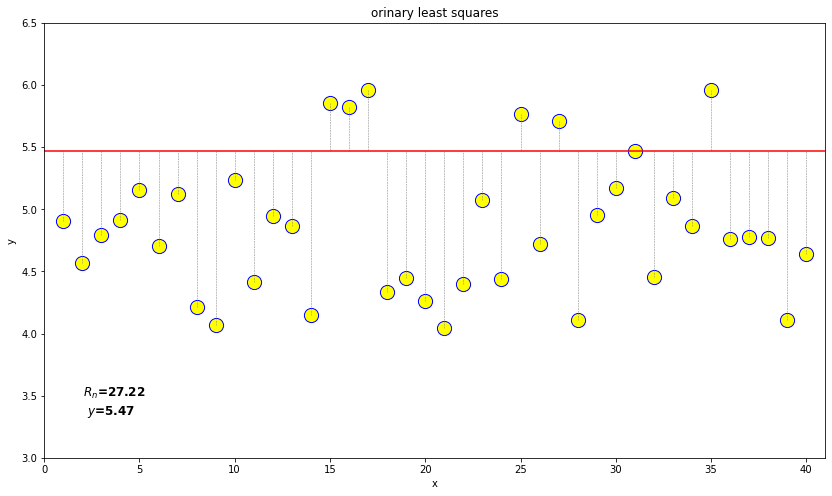

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import time

np.random.seed(0)
n = 40
y_real = 5
frame = 50

x = np.arange(1, n+1)
# 随机偏移
bias = 1 - 2 * np.random.rand(n)
# 数据点
y_test = y_real + bias

# 创建图像和坐标轴对象
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_facecolor('w')

# 拟合的曲线
y_appr = y_real - 1
for i in range(frame):
    ax.clear()
    
    # 绘制虚线
    for j in range(n):
        ax.plot([x[j], x[j]], [y_test[j], y_appr], linestyle='--', linewidth=0.5, color='gray')
        
    # 绘制散点图
    scatter = ax.scatter(x, y_test, color='b', facecolors='yellow', s=200)
    
    # 绘制回归线
    ax.axhline(y=y_appr, color='r')

    # 计算误差
    Rn = np.sum((y_appr - y_test)**2)
    
    # 设置坐标轴范围和标签
    ax.set_xlim(0, n+1)
    ax.set_ylim(y_real-2, y_real+1.5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    # 设置标题
    ax.set_title('orinary least squares'.format(Rn, y_appr))
    ax.text(0.05, 0.1, '$R_n$={:.2f} \n $y$={:.2f}'.format(Rn, y_appr), transform=ax.transAxes,
            fontsize=12, fontweight='bold', color='black')
    
    # 清除上一帧的图像
    clear_output(wait=True)
    
    # 显示当前帧的图像
    display(fig)
    
    # 暂停一段时间
    time.sleep(0.1)
    
    # 更新预测值
    y_appr += 1.5/frame

plt.close()

## 论证：最小二乘法有极小值
对于$R_n$求：

* 一阶导数
$$\frac{{dR_n}}{{dy}} = \frac{{d}}{{dy}} \sum_{i=1}^{n}(y - y_i)^2$$

使用链式法则，我们可以将求和符号中的每一项分别求导，然后将它们加起来：

$$\frac{{dR_n}}{{dy}} = 2 \sum_{i=1}^{n}(y - y_i)$$

* 二阶导数

$$\frac{{d^2R_n}}{{dy^2}} = \frac{{d}}{{dy}} \left(2 \sum_{i=1}^{n}(y - y_i) \right)$$

再次应用链式法则，我们可以得到：

$$\frac{{d^2R_n}}{{dy^2}} = 2 \sum_{i=1}^{n} 1 = 2n$$

1. 通过一阶导数为0的点来寻找Rn的极小值点（斜率为0，无变化）。
2. 而通过二阶导数的正负性来确认极小值点的性质，即判断曲线在该点处是否向上弯曲（正-斜率变大，上弯曲；负-斜率变小，下弯曲）。

### 论证：极小值可以求得真实值y，且就是样本数据的算术平均值
我们来解一阶导数为0的方程，以找到使得Rn取得极小值的y的值。

首先，我们设置一阶导数为0：

$$\frac{{dR_n}}{{dy}} = 2 \sum_{i=1}^{n}(y - y_i) = 0$$

将等式两边除以2：

$$\sum_{i=1}^{n}(y - y_i) = 0$$

展开求和符号：

$$ny - \sum_{i=1}^{n}y_i = 0$$

将等式重新排列：

$$ny = \sum_{i=1}^{n}y_i$$

最后，通过除以n，我们可以得到y的值：

$$y = \frac{1}{n}\sum_{i=1}^{n}y_i$$

这个方程表示了使得Rn取得极小值的y的值。具体来说，y的值等于y_i的平均值。


也就是说算术平均数可以让误差（欧几里得范数意义下）最小。

算数平均值只是最小二乘法应用的特例，可以看作是一组数据的0阶拟合，多项式拟合以及函数逼近就是更广泛一点的应用了。

## 扩展：最小二乘法的概率解释[5][6]

* 极大似然估计[7]

根据极大似然估计的思想，我们是基于观测到的样本数据信息，寻找最有可能产生这些观测数据的参数值。具体而言，我们希望找到使得样本数据出现的概率最大的参数值。也就是说，通过调整参数值来使得该概率分布与观测数据最匹配。

为了实现这一目标，我们构建了一个关于参数的似然函数（likelihood function），它表示在给定参数值下观测数据出现的概率。然后，我们通过最大化似然函数来求解最有可能的参数值。以一开始的书本边长测量为例[2]，设测量误差为随机变量$\epsilon_i = |y_i - y|$，服从未知的概率分布$p(\epsilon)$，进而得到似然函数：

$$L(y) = p(\epsilon_1) p(\epsilon_2) \cdots p(\epsilon_n) = p(y_1 - y) p(y_2 - y) \cdots p(y_n - y) = \prod_{i=1}^{n} p(\epsilon_i)$$。 

求解过程中可以通过找到驻值点来得到极值。驻值点（stationary point）是函数在某个点上的导数为零或不存在的点。也就是说，在驻值点处，函数的导数等于零或者函数在该点的导数不存在。驻值点包括极小值点、极大值点和拐点。在极小值点和极大值点，函数在该点的导数为零。而在拐点，函数在该点的导数不存在，即函数的曲线在该点处发生弯曲。

$$ \frac{d}{dy} L(y) = 0$$

如果最小二乘是对的，那么：

$$\frac{d}{dy} L(y) |_{y=\bar{y}} = 0$$

* 推断的过程

通过极大似然估计的思想来确定未知的概率分布$p(\epsilon)$，这是一种统计推断问题。

在进行推断时，我们通常需要假设概率分布的形式或者给定某些假设条件。对于未知的概率分布$p(\epsilon)$，我们可以尝试假设它属于某个参数化的分布族，例如正态分布、指数分布等。

一种常见的方法是使用最大似然估计来估计参数化分布中的参数值，从而确定未知的概率分布$p(\epsilon)$。具体步骤如下：

1. 假设概率分布$p(\epsilon)$属于一个已知的参数化分布族，并假设参数为$\theta$。
2. 构建似然函数$L(\theta)$，它表示观测数据出现的概率关于参数$\theta$的函数。在这里，观测数据是样本误差$\epsilon_i$。
3. 对似然函数$L(\theta)$取对数并求负，得到负对数似然函数$-\log L(\theta)$。
4. 最大化负对数似然函数$-\log L(\theta)$，即通过对参数$\theta$进行优化来找到使得观测数据出现概率最大化的参数值。

设$\epsilon$为测量误差，由于$\epsilon_i$是独立同分布的，那么根据中心极限定理，误差的分布就应该是正态分布，我们假设$\epsilon$服从正态分布$N(\mu, \sigma^2)$，其中$\mu$是均值，$\sigma$是标准差。根据极大似然估计的思想，我们希望找到使得观测数据出现的概率最大化的$\mu$和$\sigma$。我们可以将似然函数写成：

$$L(\mu, \sigma) = \prod_{i=1}^{n} p(\epsilon_i) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(\epsilon_i - \mu)^2}{2\sigma^2}}$$

为了最大化似然函数，我们可以取对数并将问题转化为最小化负对数似然函数。即求解以下方程：

$$-\log L(\mu, \sigma) = -\sum_{i=1}^{n}\left(\log(\frac{1}{\sqrt{2\pi}\sigma}) + \frac{(\epsilon_i - \mu)^2}{2\sigma^2}\right)$$

我们可以通过对$\mu$和$\sigma$分别求偏导数并令导数等于零，来求解最大似然估计的参数。对于正态分布，最大似然估计将给出均值$\mu$和标准差$\sigma$的估计值。

最大似然估计会等价于最小化残差平方和，因为最大化观测数据的联合概率就等价于最小化负对数似然函数，而负对数似然函数与残差平方和成正比。

## 参考文献

* [1] 最小二乘法百度百科 https://baike.baidu.com/item/%E6%9C%80%E5%B0%8F%E4%BA%8C%E4%B9%98%E6%B3%95/2522346?fr=ge_ala
* [2] 多方位理解最小二乘法|从均值到正态分布 https://www.bilibili.com/read/cv11596191/
* [3] 勒让德：一个生在英雄时代，又被年轻高斯气得发狂的数学家 https://zhuanlan.zhihu.com/p/147641642
* [4] 勒让德简介 https://baike.baidu.com/item/%E9%98%BF%E5%BE%B7%E5%88%A9%E6%98%82%C2%B7%E7%8E%9B%E5%88%A9%C2%B7%E5%9F%83%C2%B7%E5%8B%92%E8%AE%A9%E5%BE%B7/8791520
* [5] 最小二乘法的概率解释 https://blog.51cto.com/u_16146153/6387070
* [6] 最小二乘法的概率解释-最大似然方法 https://www.cnblogs.com/shibalang/p/4974583.html
* [7] 一文了解最大似然估计(Maximum Likelihood Estimation) https://mp.weixin.qq.com/s?__biz=MzI1MjQ2OTQ3Ng==&mid=2247604343&idx=1&sn=8659045f8c4279710a205da9303af5e8&chksm=e9e051fcde97d8ea1dc8cc716325c4e7c8ce7da52af653e8462039f51caa7ad7703805d18626&scene=27